#### 8주차
__feature set__

In [1]:
# feature set 을 dictionary 형태로 구현 및 반환 
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [2]:
bag_of_words(['the', 'quick', 'brown', 'fox'])

{'the': True, 'quick': True, 'brown': True, 'fox': True}

In [3]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
nltk.download('punkt')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #리뷰 문서 id를 반환
print(movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print(movie_reviews.categories()) # label 긍부정 분류 
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label 부정인 id 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label 긍정인 id 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서 id 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence-tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word-tokenize한 결과 중 앞 열 단어


review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kenken/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kenken/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import collections
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #"neg", "pos" 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats
lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [5]:
len(lfeats['neg'])

1000

In [6]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [7]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

In [8]:
# bag of words model 을 이용한 feature 추출 두번째 방법 
# 각 문서를 먼저 word list와 label의 list로 변환
# feature 추출의 대상이 되는 단어 집합 구성 
# 각 문서에 대해 feature 추출 대상 단어들을 대상으로 해당 단어가 문서에 있는 지의 여부를 dict 로 작성 
# 생성된 featured와 label로 문서들에 대한 feature set 을 구성 

In [10]:
from nltk.corpus import movie_reviews
import random
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)
# 카테고리별로 fileid 추출, 해당 filedid 에 대한 문서의 word tokenize 


In [11]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
# 단어별 빈도수 계산 함수 

In [12]:
for word in list(all_words)[:10]:
    print(word, all_words[word])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822


In [13]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:10]:
    print(word, all_words[word])
print(sorted_features[:10])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']


In [16]:
word_features = sorted_features[:2000] #빈도가 높은 상위 2000개의 단어만 추출하여 features를 구성

# 상위 2000개의 단어 뽑기 
print(word_features[:100]) 

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [17]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #2000개의 단어에 True, False로 입력
    return features

In [18]:
# documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [19]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용


2000
neg
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': False, 'this': True, 'film': True, 'i': False, 'he': False, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': True, 'one': True, 'movie': False, 'an': True, 'who': True, 'not': False, 'you': True, 'from': False, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': True, 'all': True, '?': True, 'there': True, 'like': False, 'so': False, 'out': True, 'about': True, 'up': True, 'more': True, 'what': True, 'when': True, 'which': False, 'or': False, 'she': True, 'their': True, ':': False, 'some': True, 'just': False, 'can': False, 'if': False, 'we': False, 'him': False, 'into': False, 'even': True, 'only': True, 'than': True, 'no': True, 'good': False, 'time': True, 'most': True, 'its': False, 'will': Fa

In [20]:
# bow feature set 맛보기 
train_set, test_set = featuresets[100:], featuresets[:100] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(5)  # 분류기에 영향 많이 미치는 상위 5대 단어


0.78
Most Informative Features
             outstanding = True              pos : neg    =     11.1 : 1.0
                   mulan = True              pos : neg    =      8.8 : 1.0
                  seagal = True              neg : pos    =      8.4 : 1.0
             wonderfully = True              pos : neg    =      7.1 : 1.0
                    lame = True              neg : pos    =      6.4 : 1.0


In [21]:
testfeat = bag_of_words(['the', 'actor', 'was', 'seagal']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['the', 'story', 'was', 'outstanding'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['the', 'plot', 'was', 'ludicrous']) # ??
print(classifier.classify(negfeat))
posfeat = bag_of_words(['kate', 'winslet', 'is', 'accessible']) # 이해가 돼!
print(classifier.classify(posfeat))

neg
pos
neg
pos


In [22]:
# sickit count vector
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 2,000개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [26]:
print('reviews count:', len(reviews))

reviews count: 2000


In [27]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [28]:
print(X[0].toarray()[0, :100]) #변환된 결과 처음  feature set 중에서 앞 100개를 출력
print(max(X[0].toarray()[0])) #변환된 결과 처음 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3  2  2  2  4  1  4  2  0  0  0  0  4  0  0  4  1  5  3  1  0  1  2
  0  4  4  0  0  1  2  0  2  1  3  0  2  2  1  0  2  1  0  0  0  2  2  0
  3  2  5  1]
38


In [29]:
for word, count in zip(cv.get_feature_names()[:20], X[0].toarray()[0, :20]):
    print(word, ':', count)

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8
s : 0
" : 0
it : 25
that : 13
- : 0
) : 0
( : 0
as : 1
with : 5
for : 4


In [ ]:
# cosine similarity - 문서간 유사도 계산 및 가장 유사한 문서 검색 

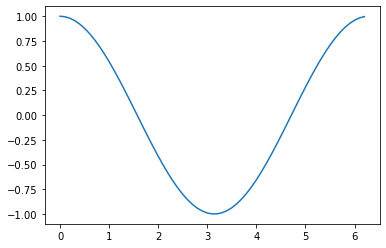

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.1)
y = np.cos(x)
plt.plot(x, y)
plt.show()

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation. they are small pokemon with a powerful punch and have great psychic abilities"
new_vec = cv.transform([new_review]) #문서 -> count vector

sim_result = cosine_similarity(new_vec, X) #count vector와 기존 값들과의 similarity 계산하는ㄱㅓ
print(sorted(sim_result[0], reverse=True)[:10])

[0.47404152357849716, 0.4354705693078365, 0.4179484687443539, 0.40669013197195214, 0.4042441311205991, 0.4031257527594671, 0.39316730570210306, 0.38744458895341755, 0.3852303002224743, 0.384468719848977]


In [32]:
import numpy as np
np.argmax(sim_result[0])

679

In [33]:
print(reviews[679])

 " pokemon 3 : the movie " has a lot of bad things in it . 
first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation . 
the first film came out the end of 1999 and was a huge hit grossing almost $90 million domestically . 
a sequel soon followed and even made $45 million . 
warner has released their third movie based on the immensely popular video game and tv series and its a waste of time and celluloid . 
this time ash ketchum and his friends are on their way to the johto battles ( which my little brother told me the new spinoff is " pokemon : the johto journeys " so go figure ) anyway he comes in contact with a young girl who's father has disappeared after trying to discover the unown . 
they are small pokemon with a powerful punch and have great psychic abilities . 
the unown bring together their psychic abilities and create entei a powerful legendary pokemon who barriers young molly's house and creates every wish she wants . 
now

In [34]:
(-sim_result[0]).argsort()[:10]

array([ 679,  176, 1152, 1575,  952,  470,  688, 1144,  103,  159])

In [35]:
# counter vector -> TFIDF vector 
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
transformer

TfidfTransformer()

In [36]:
X_tfidf = transformer.fit_transform(X)
print(X_tfidf.shape)
print('max count score of the first vector:', max(X[0].toarray()[0]))
print('max tfidf score of the first vector:', max(X_tfidf[0].toarray()[0]))

(2000, 2000)
max count score of the first vector: 38
max tfidf score of the first vector: 0.3958279594831942


In [37]:
new_tfidf = transformer.transform(new_vec)
sim_result_tf = cosine_similarity(new_tfidf, X_tfidf)
np.argmax(sim_result_tf[0])

679

In [38]:
print(sorted(sim_result_tf[0], reverse=True)[:10])

[0.39386919931415737, 0.2158533727955655, 0.2055888622850777, 0.18940610744482467, 0.18862790397285573, 0.18841943811025338, 0.18329868368380425, 0.1810784645715442, 0.17853711709135542, 0.17620991687411133]


In [39]:
#count vector에 대한 유사도 상위 문서와 TFIDF 대한 유사도 상위 문서를 비교

print('Count vector:', (-sim_result[0]).argsort()[:10])
print('TFIDF vector:', (-sim_result_tf[0]).argsort()[:10])

Count vector: [ 679  176 1152 1575  952  470  688 1144  103  159]
TFIDF vector: [ 679  577 1209 1933  672 1280    3  913 1596 1163]


In [63]:
# JACCARD SIMILARITY 
from sklearn.metrics import cohen_kappa_score, jaccard_score
tfidf_list = [679, 1280,  577, 1933, 1209, 1115, 1274, 913, 1456, 1796]
# 패키지 업데이트로 인해 코드 수정 
# binary 가 아닌경우 average 값을 수정해 줘야 한다. 

for i in tfidf_list:
    print(jaccard_score(new_vec.toarray()[0], X[i].toarray()[0]
          , average='micro'))

0.8596001859600186
0.9314340898116852
0.8407731247123792
0.7452006980802792
0.8805829807240244
0.6792611251049538
0.6792611251049538
0.8458698661744347
0.7905102954341987
0.8018018018018018


In [64]:
print(new_vec.toarray())

[[0 0 0 ... 0 0 0]]


In [66]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 100, n_iter = 7, random_stat e= 42) #압축할 component의 수 지정
svd.fit(X_tfidf)  
print(svd.explained_variance_ratio_)  # 계산된 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  # 선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 다름
print(svd.singular_values_)  
newX = svd.transform(X_tfidf) #선택된 component를 이용하여 2000개의 feature로부터 feature extract (dimension reduce)
## 라고한다 

[0.01514489 0.0166241  0.01317354 0.01030468 0.00756888 0.00725983
 0.00659312 0.00580567 0.00550706 0.00504246 0.00483872 0.00470389
 0.00453713 0.0043536  0.00431135 0.00415999 0.004104   0.00402205
 0.00382987 0.00380754 0.0036883  0.00367408 0.00363124 0.00352173
 0.00347459 0.00339472 0.00335051 0.00325916 0.00323815 0.00315384
 0.00314674 0.00304913 0.00300347 0.00299865 0.00295145 0.00292693
 0.00289485 0.00287923 0.00282802 0.00280223 0.00277773 0.00274264
 0.00271311 0.00268979 0.00265569 0.00264501 0.00259901 0.00257714
 0.0025622  0.00254445 0.00249797 0.00245484 0.00243712 0.00241656
 0.00238654 0.00235366 0.00234395 0.00233282 0.00229758 0.002295
 0.00227465 0.00226673 0.00224546 0.00223066 0.00221365 0.00220156
 0.00219036 0.00218628 0.00216656 0.00216035 0.00215562 0.00211927
 0.00211044 0.00207907 0.00207117 0.00205964 0.00205848 0.00203116
 0.00202441 0.00199946 0.00199753 0.00199207 0.00197294 0.0019617
 0.0019585  0.00193714 0.00191767 0.00191458 0.00189811 0.0018677

In [67]:
print(svd.components_.shape)
print(newX.shape)

(100, 2000)
(2000, 100)


In [68]:
svd.components_[0]

array([ 9.86899031e-30,  6.30071943e-01, -6.21983916e-32, ...,
        2.65980872e-03,  2.57052959e-03,  2.46302852e-03])

#### 9주차 
__keras__

In [69]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() # 다시 가져오기 
reviews = [movie_reviews.raw(fileid) for fileid in fileids] 
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


In [76]:
from keras.preprocessing.text import Tokenizer
# 텐서플로 > 케라스로 순차적으로 설치 

max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

X = tokenizer.texts_to_sequences(reviews)
print('num of tokens:', len(tokenizer.word_index))

num of tokens: 43296


In [77]:
bow = tokenizer.texts_to_matrix(reviews, mode='binary')
bow.shape

(2000, 10000)

In [78]:
from keras import preprocessing

maxlen = 500

X = preprocessing.sequence.pad_sequences(X, maxlen = maxlen, truncating = 'pre')
print(X[0])

[  38    1  328   52   20  769   52   20   52   20    2    4  910  114
   52   20 5277    4 1386  171    8  632    3   63    4    9    6  321
   25 1957  143   18 2926  120  301  254    5 9489    2   15  150  143
    3  102   16   44   35    9   91    6  256  103    1  164 2851  100
    3  100  208   18   72  259    4 4077   42   82    2   94   45    6
   14  247  954  353   37  613  294   14  133  801    5 3146   16    9
  138    5  257    5 3146    9  308  313   64  369  493  226    3   75
   36   86  171  439 2795   46   56 1747    7    1 5675   25   92    1
 1280  204    6    8    1 4078    3   18  158 5676   19 1711   38   14
   39   62  175 4079   63    4    9   40   21    1  268   84  212   39
   35    4    1   82    8  197  442    5   86    2   98  251    4  261
   16    9  137  248    1   86    1   15   35    8   43  439   18  618
    1 1486  311   11  121   38   14    6    8   34  167  245   86  276
    8    1  161    6   55    9   56  141   36   20  284    1  801    5
 2016 

In [79]:
label_dict = {'pos':0, 'neg':1}
y = [label_dict[c] for c in categories]
print(y[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [80]:
from sklearn.model_selection import train_test_split # sklearn에서 제공하는 split 함수 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# sklearn의 train_test_split 함수는 먼저 data set을 shuffle하고 주어진 비율에 따라 train test 로 stratified 가능 
# 리뷰를 X_train과 X_test로 8:2의 비율로 나누고 categories를 y_train과 y_test로 나눔
# 이 때 X와 y의 순서는 동일하게 유지해서 각 입력값과 label이 정확하게 match되도록 함
# random_state는 shuffle에서의 seed 값으로 랜덤으로 지정해주고 지정한 경우 항상 동일한 결과로 shuffle이 됨

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]


In [82]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid')) # sigmoid 외에 다른 것도 사용 가능 
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()
# np.array 로 배열 형태로 만들어 줘야 돌아간다. 
y_train = np.array(y_train)
history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 0s 38ms/step - loss: 0.6938 - acc: 0.5133 - val_loss: 0.6900 - val_acc: 0.5281
Epoch 2/30
5/5 [==============================] - 0s 14ms/step - loss: 0.6408 - acc: 0.9055 - val_loss: 0.6871 - val_acc: 0.5344
Epoch 3/30
5/5 [==============================] - 0s 15ms/step - loss: 0.5972 - acc: 0.9258 - val_loss: 0.6833 - val_acc

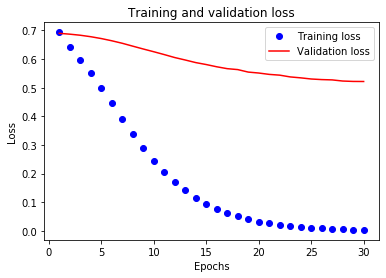

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

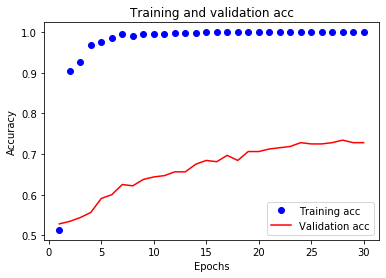

In [87]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [86]:
score = model.evaluate(X_test, np.array(y_test))
print(score)
## train set 의 크기가 너무 작아서 문제가 있음 크기를 키우거나 pre- trained embedding vector 사용 

13/13 [==============================] - 0s 1ms/step - loss: 0.4897 - acc: 0.7575
[0.48966720700263977, 0.7574999928474426]


In [2]:

import os
import numpy as np
print("before: %s"%os.getcwd())
os.chdir("/Users/kenken/Desktop/3-2/수업/캡스톤")
print("after: %s"%os.getcwd())
embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Num of word vectors:', len(embeddings_index))

before: /Users/kenken
after: /Users/kenken/Desktop/3-2/수업/캡스톤
Num of word vectors: 400000


In [97]:
# 처음 데이터를 생성할 때 사용한 tokenizer에서 word_index를 추출
# word_index에 맞게 glove 로부터 해당하는 word vector를 가져옴
word_index = tokenizer.word_index
len(word_index)

43296

In [98]:
# embedding matrix를 생성함 word_index에서 max_words 만큼의 단어에 대해 glove의 embeddings_index를 추출하여 matrix 생성
# 추출한 matrix는 embedding 층의 weight로 고정해서 사용함

embedding_dim = 100 # glove의 vector dimension
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [99]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import SimpleRNN, LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [100]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # 값을 고정
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [101]:
from keras import optimizers

adam = optimizers.Adam(lr=0.005) #default lr은 0.001

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2) 


Epoch 1/30
5/5 [==============================] - 2s 348ms/step - loss: 0.7247 - acc: 0.4930 - val_loss: 0.6879 - val_acc: 0.5250
Epoch 2/30
5/5 [==============================] - 1s 281ms/step - loss: 0.6804 - acc: 0.5680 - val_loss: 0.6846 - val_acc: 0.5469
Epoch 3/30
5/5 [==============================] - 1s 282ms/step - loss: 0.6735 - acc: 0.5984 - val_loss: 0.6725 - val_acc: 0.5813
Epoch 4/30
5/5 [==============================] - 1s 267ms/step - loss: 0.6607 - acc: 0.6242 - val_loss: 0.6694 - val_acc: 0.5906
Epoch 5/30
5/5 [==============================] - 1s 274ms/step - loss: 0.6502 - acc: 0.6180 - val_loss: 0.6597 - val_acc: 0.6187
Epoch 6/30
5/5 [==============================] - 1s 262ms/step - loss: 0.6325 - acc: 0.6570 - val_loss: 0.6456 - val_acc: 0.6281
Epoch 7/30
5/5 [==============================] - 1s 252ms/step - loss: 0.6083 - acc: 0.6758 - val_loss: 0.6699 - val_acc: 0.5938
Epoch 8/30
5/5 [==============================] - 1s 254ms/step - loss: 0.6198 - acc: 0.63

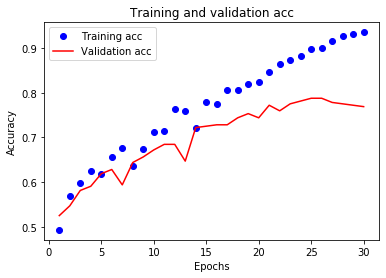

In [102]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [104]:
score = model.evaluate(X_test, np.array(y_test))
print(score)

13/13 [==============================] - 0s 23ms/step - loss: 0.5641 - acc: 0.7450
[0.5640632510185242, 0.7450000047683716]


In [105]:
# glove 사용 없이 정교한 모형을 사용해서 학습해보자 

from keras.layers import SimpleRNN, LSTM
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.1))) #0.01을 먼저 시도했음
# activation 조정 가능 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [106]:
from keras import optimizers
rmsprop = optimizers.RMSprop(lr=0.005) # deafult 값 0.001 

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc']) 

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2) 

Epoch 1/30
5/5 [==============================] - 1s 283ms/step - loss: 0.8687 - acc: 0.5266 - val_loss: 0.8326 - val_acc: 0.5656
Epoch 2/30
5/5 [==============================] - 1s 210ms/step - loss: 0.8678 - acc: 0.7234 - val_loss: 0.7784 - val_acc: 0.6125
Epoch 3/30
5/5 [==============================] - 1s 207ms/step - loss: 0.6484 - acc: 0.8141 - val_loss: 0.7522 - val_acc: 0.6344
Epoch 4/30
5/5 [==============================] - 1s 200ms/step - loss: 0.4909 - acc: 0.9031 - val_loss: 0.7841 - val_acc: 0.6062
Epoch 5/30
5/5 [==============================] - 1s 212ms/step - loss: 0.4017 - acc: 0.9289 - val_loss: 0.7841 - val_acc: 0.6094
Epoch 6/30
5/5 [==============================] - 1s 212ms/step - loss: 0.3383 - acc: 0.9602 - val_loss: 0.7865 - val_acc: 0.6562
Epoch 7/30
5/5 [==============================] - 1s 202ms/step - loss: 0.2860 - acc: 0.9664 - val_loss: 0.8402 - val_acc: 0.6438
Epoch 8/30
5/5 [==============================] - 1s 207ms/step - loss: 0.3038 - acc: 0.95

In [107]:
score = model.evaluate(X_test, np.array(y_test))
print(score)

13/13 [==============================] - 0s 19ms/step - loss: 0.9559 - acc: 0.6325
[0.9558971524238586, 0.6324999928474426]


> #### keras 4 korean

In [109]:
import csv

text = []
y = []
with open('movie_data_new.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        # 그 줄에 내용 있으면 
        if row: 
            text.append(row[0]) # 리뷰 >  text 리스트에 추가
            y.append(row[2]) # 영화이름 >  text 리스트에 추가

In [110]:
print('Num of samples: {}'.format(len(text)))
print('Movie titles of reivews: {}'.format(set(y)))

Num of samples: 14967
Movie titles of reivews: {'라라랜드', '택시운전사', '곤지암', '코코', '범죄도시', '인피니티 워', '신과함께'}


In [111]:
label_dict = dict(zip(set(y),range(len(set(y)))))
y = [label_dict[c] for c in y]
print(len(y))
print(y[-10:])

14967
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [113]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

In [114]:
from konlpy.tag import Okt # Twitter 형태소 분석기 import
twitter_tag = Okt()

In [117]:
print(twitter_tag.nouns(text[4]))
print(twitter_tag.nouns(text[4][0]))

['내', '졸라']
['내']


In [127]:
## 나머지는 모듈이 없거나 패키지 오류로 여기까지 

ValueError: Found input variables with inconsistent numbers of samples: [2000, 14967]

## pandas topic moodel 

In [3]:
import pandas as pd

movie = pd.read_csv('movie_data_new.csv', header = None) 

print('리뷰 수:', len(movie))
print('리뷰영화:', set(movie.ix[:,2])) 

리뷰 수: 14967
리뷰영화: {'인피니티 워', '곤지암', '라라랜드', '코코', '범죄도시', '택시운전사', '신과함께'}


<ipython-input-3-f214ac33d8f3>:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  print('리뷰영화:', set(movie.ix[:,2]))


In [4]:
text = movie.ix[:,0]

<ipython-input-4-37175e1042d7>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  text = movie.ix[:,0]


In [5]:
from konlpy.tag import Okt 
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer = twitter_tag.nouns, 
                      decode_error ='ignore', 
                      max_df = 0.5, 
                      max_features = 1000) 
review_cv = vec.fit_transform(text)

In [6]:
review_cv.shape

(14967, 1000)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10, # 추출할 topic 수 지정
                                max_iter =25, # max_iter 5,000~10,000번 시도함 
                                topic_word_prior = 0.1, doc_topic_prior = 1.0,
                                # beta 와 alpha beta 는 보통 0.1 고정 alpha는 50 까지 왔다갔다
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽 부각 가능 
                                learning_method = 'batch', # batch > onlin 에 비해 더 성능이 좋고 느리다고함 
                                n_jobs = -1, # 사용 프로세서 수
                                random_state = 0)

review_topics = lda.fit_transform(review_cv)

In [8]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (14967, 10)


In [9]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end = '')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
    print()
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 정말, 생각, 기대, 원작, 내, 안, 인생, 작품, 난, 굿
Topic #1: 더, 그, 광주, 말, 다시, 가슴, 우리, 한번, 송강호, 택시
Topic #2: 것, 좀, 장면, 때, 나, 음악, 사랑, 이야기, 번, 현실
Topic #3: 스토리, 시간, 돈, 정도, 신파, 감독, 거, 한국, 듯, 수준
Topic #4: 그냥, 편, 마블, 뭐, 이해, 공포, 노스, 역시, 느낌, 다음
Topic #5: 최고, 마동석, 볼, 함, 액션, 공포영화, 임, 완전, 걸, 중
Topic #6: 사람, 점, 수, 꼭, 부분, 분, 이, 웹툰, 역사, 조금
Topic #7: 감동, 눈물, 재미, 마지막, 보고, 내용, 가족, 처음, 끝, 추천
Topic #8: 연기, 배우, 진짜, 왜, 윤계상, 차태현, 연출, 또, 대박, 모두
Topic #9: 영화, 이, 평점, 만, 관객, 신, 천만, 비, 알바, 제



In [10]:
twitter_tag.nouns(text[1])

['충격', '결말']

In [11]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]
tokenizer(text[1])

['충격', '결말']

In [12]:
vec = CountVectorizer(tokenizer = tokenizer, decode_error ='ignore', 
                      max_df = 0.5, max_features = 1000) # 많이 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [13]:
# 모델링 
lda = LatentDirichletAllocation(n_components = 50, max_iter = 25, 
                                topic_word_prior = 0.1, doc_topic_prior=1.0,
                                learning_method = 'batch',
                                n_jobs = -1,
                                random_state = 0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 지금, 나름, 영화, 모든, 시간, 아픔, 조폭, 재판, 고생, 스토리
Topic #1: 가족, 조연, 영화, 주연, 공감, 디즈니, 점수, 픽사, 감동, 스트레스
Topic #2: 영화, 얼마나, 어른, 충격, 더욱, 여기, 사람, 폭력, 내용, 설명
Topic #3: 진짜, 소리, 인간, 엄마, 동생, 줄거리, 아무, 상상력, 장첸, 기담
Topic #4: 한번, 영화, 사실, 표현, 개봉, 곤지암, 외국, 해도, 생각, 묘사
Topic #5: 신파, 몰입, 명작, 기술, 아주, 박수, 얼굴, 영화, 스토리, 표정
Topic #6: 생각, 대박, 수준, 극장, 영화, 스토리, 가지, 유머, 걱정, 사람
Topic #7: 기억, 억지, 반전, 얘기, 감동, 개연, 형사, 영화, 장면, 슬픔
Topic #8: 한국, 차태현, 위해, 제대로, 발전, 모습, 신파극, 영화, 인정, 효과
Topic #9: 추천, 다음, 강추, 범죄, 도시, 꿀잼, 영화, 전반, 오역, 만큼
Topic #10: 부분, 지옥, 영화, 장면, 대해, 자극, 감동, 사람, 마지막, 스릴
Topic #11: 평점, 영화, 아쉬움, 이유, 혼자, 스크린, 흐름, 추격, 수가, 깡패
Topic #12: 원작, 대한, 전혀, 아들, 대사, 오히려, 배경, 내용, 문제, 수작
Topic #13: 한국영, 정말, 영화, 영화로, 제발, 마무리, 그냥, 이영화, 상상, 사건
Topic #14: 광주, 역사, 시민, 가슴, 전두환, 기자, 민주주의, 그날, 사복, 독일
Topic #15: 정말, 모두, 관객, 영화, 감독, 시대, 희생, 나라, 반복, 고민
Topic #16: 사랑, 영화, 이제, 가장, 집중, 감성, 갈수록, 겨울왕국, 최근, 소름
Topic #17: 웹툰, 조금, 영화, 설정, 생각, 상황, 누구, 스토리, 현실, 그대로
Topic #18: 영화, 이상, 보지, 이후, 오락, 감사, 선택, 헐리웃, 장난, 불가
Topic #19: 송강호, 택시, 천만, 운전사, 전

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5) 
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [2 2 0 4 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 2 2 2 2 2]


In [15]:
# T-SNE를 사용하여 topic간 관계를 시각화 하자 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([ -36.12659  ,   78.82156  ,   78.297874 ,  -89.08372  ,
        -52.266777 ,  -99.45901  ,   94.53287  ,  -19.530266 ,
         63.584053 ,  -44.214222 ,  -90.222115 , -180.20229  ,
         46.63776  ,  -43.489246 ,  151.91518  ,  159.74916  ,
         28.865545 ,  -92.782814 ,  -58.987446 , -112.491615 ,
         45.38165  , -161.61781  ,   57.45355  ,  -56.085114 ,
        -25.626373 ,   28.665478 , -133.71577  ,    3.4239352,
        100.54615  ,   83.311646 ,  155.50725  ,    9.047254 ,
       -196.71208  ,  -27.374905 ,    4.74548  ,  -70.07494  ,
         -7.390206 ,  -32.294903 ,   49.576607 ,   13.394755 ,
        -84.81128  , -133.31686  ,  -10.590001 ,  -14.82194  ,
         97.01834  ,   37.62988  ,   10.061464 ,  147.5545   ,
         42.75942  , -120.913124 ], dtype=float32)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
path = '/Users/kenken/Library/Fonts/SCDream1.otf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font')
# 폰트 깨지는거 대처 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

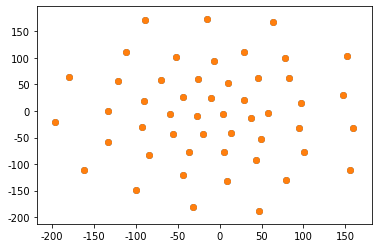

In [17]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

#     plt.text(x1[i], x2[i], kmeans.labels_[i],
#         color = colors[kmeans.labels_[i]])
plt.show()

In [18]:
lda.perplexity(review_cv)

580.543896287845

In [20]:
lda = LatentDirichletAllocation(n_components = 25, max_iter = 25, 
                                topic_word_prior = 0.1, doc_topic_prior = 2.0,
                                learning_method ='batch',
                                n_jobs = -1,
                                random_state = 0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 영화, 스토리, 연기, 저승, 감동, 악역, 상영, 조폭, 윤계상, 지금
Topic #1: 영화, 가족, 감동, 노래, 디즈니, 점수, 주연, 자신, 조연, 픽사
Topic #2: 영화, 감동, 동안, 진짜, 더욱, 최고, 음악, 마음, 폭력, 장르
Topic #3: 인간, 엄마, 진짜, 하정우, 사람, 어머니, 모습, 영화, 하나, 순간
Topic #4: 광주, 영화, 국민, 전두환, 우리, 절대, 민주화, 당시, 해도, 외국
Topic #5: 영화, 신파, 중간, 연기, 명작, 코코, 정말, 기술, 언제, 몰입
Topic #6: 영화, 생각, 극장, 스토리, 재미, 가지, 감동, 걱정, 출연, 대박
Topic #7: 영화, 연출, 대한민국, 흥행, 반전, 얘기, 형사, 역사, 슬픔, 죽음
Topic #8: 영화, 차태현, 한국, 세계, 제대로, 신파극, 위해, 인정, 발전, 효과
Topic #9: 다음, 영화, 범죄, 편이, 추천, 마블, 도시, 꿀잼, 마동석, 번역
Topic #10: 영화, 감동, 만화, 부분, 대해, 자극, 볼거리, 정말, 생각, 스릴
Topic #11: 영화, 연기, 아쉬움, 마동석, 윤계상, 긴장감, 완성, 스크린, 평점, 기대
Topic #12: 원작, 영화, 스토리, 지옥, 웹툰, 아들, 오히려, 개연, 대사, 전혀
Topic #13: 영화, 어벤져스, 마블, 시리즈, 정말, 토르, 기대, 윤계상, 재미, 캐릭터
Topic #14: 영화, 눈물, 시민, 진실, 중반, 민주주의, 역사, 연기력, 실화, 등장
Topic #15: 영화, 관객, 정말, 시대, 모두, 감동, 희생, 남자, 나라, 거리
Topic #16: 영화, 영상, 이제, 집중, 감성, 감독, 배우, 정말, 눈물, 겨울왕국
Topic #17: 영화, 설정, 상황, 기분, 친구, 생각, 사실, 그때, 부모님, 조금
Topic #18: 영화, 이후, 이상, 보지, 관람, 평점, 역대, 감사, 알바, 진짜
Topic #19: 송강호, 영화, 배우, 택시,

In [24]:
# 모델링 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter = 25, 
                                topic_word_prior = 0.1, doc_topic_prior = 1.0,
                                learning_method ='batch',
                                n_jobs = -1,
                                random_state = 0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 감동, 보고, 스토리, 작품, 노스, 주인공, 모든, 어벤져스, 이제, 가장
Topic #1: 연기, 배우, 최고, 가족, 모두, 보기, 소재, 연기력, 조연, 이상
Topic #2: 영화, 음악, 부분, 인생, 최악, 여운, 영상, 뮤지컬, 보지, 무엇
Topic #3: 사람, 진짜, 하나, 차태현, 대박, 하정우, 소리, 인간, 지옥, 엄마
Topic #4: 광주, 역사, 다시, 가슴, 우리, 송강호, 한번, 택시, 지금, 사실
Topic #5: 정말, 눈물, 시간, 기대, 중간, 처음, 별로, 몰입, 실망, 관람
Topic #6: 생각, 재미, 스토리, 내용, 원작, 정도, 신파, 이해, 웹툰, 조금
Topic #7: 마지막, 장면, 감독, 사랑, 역시, 연출, 기억, 아이, 이야기, 대한
Topic #8: 그냥, 평점, 한국, 공포영화, 수준, 관객, 공포, 느낌, 천만, 한국영
Topic #9: 마동석, 윤계상, 마블, 액션, 완전, 추천, 다음, 결말, 때문, 아주



414.90114980452717